In [3]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt


In [9]:
folder = "daily_selected_feature_set_d_readiness/val"
results = pd.read_excel(f'/repos/Delivery-Readiness/results/{folder}/fold0.xlsx')
for i in range(1, 10):
    new_df = pd.read_excel(f'/repos/Delivery-Readiness/results/{folder}/fold{i}.xlsx')
    results = pd.concat([results, new_df], axis=0)

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [11]:
results

,Unnamed: 0,user_id,ground_truth,prediction,correctness,y_score,confidence,x_number_of_days_before_delivery
0,0,2109,0,1,False,0.588938,0.588938,-4
1,1,2134,1,1,True,0.532097,0.532097,-3
2,2,2134,0,1,False,0.589040,0.589040,-3
3,3,2142,1,1,True,0.587057,0.587057,-7
4,4,2142,0,1,False,0.532097,0.532097,-7
5,5,2171,1,1,True,0.586515,0.586515,-4
6,6,2171,0,0,True,0.416112,0.583888,-4
0,0,2109,0,1,False,0.569817,0.569817,-4
1,1,2134,1,1,True,0.590640,0.590640,-3
2,2,2134,0,0,True,0.482713,0.517287,-3


In [12]:
print(f"Accuracy: {accuracy_score(results['ground_truth'].tolist(), results['prediction'].tolist())}")
print(f"F1 Score: {f1_score(results['ground_truth'].tolist(), results['prediction'].tolist())}")
print(f"Precision: {precision_score(results['ground_truth'].tolist(), results['prediction'].tolist())}")
print(f"Recall: {recall_score(results['ground_truth'].tolist(), results['prediction'].tolist())}")

Accuracy: 0.7285714285714285
F1 Score: 0.7323943661971831
Precision: 0.6341463414634146
Recall: 0.8666666666666667


In [13]:
print(f"AUC score: {roc_auc_score(results['ground_truth'].tolist(), results['y_score'].tolist())}")

AUC score: 0.6816666666666666


In [88]:
fpr, tpr, thresholds = roc_curve(results['ground_truth'].tolist(), results['y_score'].tolist(), pos_label=1)
print(auc(fpr, tpr))

0.8209342560553632


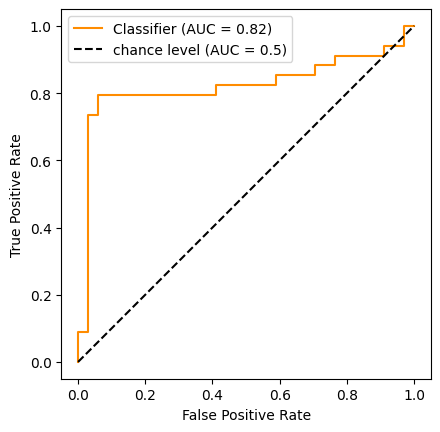

In [89]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    results['ground_truth'].tolist(),
    results['y_score'].tolist(),
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()